In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
import time

# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import collections


# Other Libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold
import warnings
warnings.filterwarnings("ignore")

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be import

In [ ]:
import os
import numpy as np

In [ ]:
os.rename("/content/9d49b18f-3861-44c1-8412-67fbb60dc0a3","/content/data.zip")

In [ ]:
!unzip /content/data.zip

Archive:  /content/data.zip
   creating: .ipynb_checkpoints/
  inflating: .ipynb_checkpoints/TP-checkpoint.ipynb  
  inflating: mimic_synthetic_feat.type  
 extracting: mimic_synthetic_label.name  
  inflating: mimic_synthetic_feat.name  
  inflating: mimic_synthetic_test.data  
  inflating: mimic_synthetic_train.data  
  inflating: mimic_synthetic_train.solution  


In [ ]:
with open("/content/mimic_synthetic_feat.name") as f:
    content = f.readlines()
columns = [x.strip() for x in content] 

In [ ]:
with open("/content/mimic_synthetic_feat.type") as f:
    content = f.readlines()
feature_type = [x.strip() for x in content] 

In [ ]:
with open("/content/mimic_synthetic_label.name") as f:
    content = f.readlines()
label_name = [x.strip() for x in content] 

In [ ]:
with open("/content/mimic_synthetic_train.solution") as f:
    content = f.readlines()
label = [x.strip() for x in content] 

In [ ]:
y_train.shape

(79999, 1)

In [ ]:
y_train.head()

,0
0,0
1,0
2,0
3,0
4,0


In [ ]:
import pandas as pd
X_train = pd.read_csv('/content/mimic_synthetic_train.data', delimiter = " ",header=None,index_col=0)
y_train = pd.read_csv('/content/mimic_synthetic_train.solution', delimiter = " ",header=None)


In [ ]:
y_train

,0
0,0
1,0
2,0
3,0
4,0
...,...
79994,0
79995,0
79996,0
79997,0


In [ ]:
actual_test = pd.read_csv('/content/mimic_synthetic_test.data', delimiter = " ",header=None,index_col=0)

In [ ]:
X_train.columns = columns

In [ ]:
actual_test.columns = columns

In [ ]:
X_train.shape

(79999, 341)

In [ ]:
actual_test.shape

(20001, 341)

In [ ]:
actual_test.fillna(method="ffill",inplace=True)

In [ ]:
X_train['label'] = y_train[0].values

In [ ]:
X_train['label'].unique()

array([0, 1])

In [ ]:
X_train.dropna(inplace=True)

In [ ]:
X_train.shape

(79986, 342)

In [ ]:
len(X_train["HADM_ID"].unique())

25370

In [ ]:
X_train.drop(columns=["SUBJECT_ID","HADM_ID",'ADMITTIME','DISCHTIME'],inplace=True)

In [ ]:
actual_test.head()

,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,INSURANCE,LANGUAGE,RELIGION,MARITAL_STATUS,ETHNICITY,GENDER,AGE,HR_MIN_DAY1,HR_MAX_DAY1,HR_MEAN_DAY1,SYS_BP_MIN_DAY1,SYS_BP_MAX_DAY1,SYS_BP_MEAN_DAY1,DIAS_BP_MIN_DAY1,DIAS_BP_MAX_DAY1,DIAS_BP_MEAN_DAY1,MEAN_BP_MIN_DAY1,MEAN_BP_MAX_DAY1,MEAN_BP_MEAN_DAY1,RESP_RATE_MIN_DAY1,RESP_RATE_MAX_DAY1,RESP_RATE_MEAN_DAY1,TEMP_MIN_DAY1,TEMP_MAX_DAY1,TEMP_MEAN_DAY1,SPO2_MIN_DAY1,SPO2_MAX_DAY1,SPO2_MEAN_DAY1,GLUCOSE_MIN_DAY1,GLUCOSE_MAX_DAY1,GLUCOSE_MEAN_DAY1,HR_MIN_DAY2,HR_MAX_DAY2,HR_MEAN_DAY2,SYS_BP_MIN_DAY2,SYS_BP_MAX_DAY2,...,Attention-deficit/conduct/disruptivebeha,Delirium/dementia/amnestic/othercognitiv,Developmentaldisorders,Disordersusuallydiagnosedininfancy/ch,ImpulsecontroldisordersNEC,Mooddisorders,Personalitydisorders,Schizophreniaandotherpsychoticdisorde,Alcohol-relateddisorders,Substance-relateddisorders,Suicideandintentionalself-inflictedin,Screeningandhistoryofmentalhealthan,Miscellaneousmentaldisorders,Viralinfect,Meningitis,Encephalitis,OthCNSinfx,Parkinson-s,Othinfectns,MS,OtheredCNS,Paralysis,Epilepsy/cnv,Headache/mig,Coma/brndmg,Cataract,Retinaldx,Glaucoma,Blindness,SexualInfxs,Eyeinfectn,Othereyedx,Otitismedia,Dizziness,Othereardx,Othnervdx,Hrtvalvedx,Carditis,HTN,Htncomplicn
0,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,3711,170374,2169-12-28_15:01:00,2127-05-18_19:00:00,Self_Pay,ENGL,OTHER,MARRIED,WHITE,F,18,72.64388,112.70850,96.464850,85.319580,121.78375,103.074420,47.445683,79.353836,59.368713,50.786823,82.327446,70.155520,8.007613,28.938442,16.247534,36.286050,38.101463,37.903645,98.635920,100.67006,99.732560,86.365000,144.41853,114.00371,76.254070,97.415680,92.526940,100.084440,119.86348,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0
1,55078,181483,2191-12-30_16:34:00,2117-12-06_14:09:00,Medicare,ENGL,NOT_SPECIFIED,SINGLE,BLACK/AFRICAN_AMERICAN,F,56,66.60985,106.79843,83.848660,92.358284,141.43913,122.410645,38.688465,89.153900,56.092617,58.877450,118.506000,78.280560,15.393166,25.053230,18.392859,36.464878,37.333344,37.079468,97.772850,99.24101,98.847450,113.581310,237.62259,177.79234,61.571000,86.063110,76.557800,82.783570,138.30591,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,1,0
2,3338,166425,2110-09-08_16:29:00,2130-12-03_14:18:00,Medicaid,ENGL,CATHOLIC,SINGLE,WHITE,M,32,69.71651,102.69377,87.261826,88.278740,176.56640,135.051400,55.030785,114.803215,75.164986,55.697186,107.969540,86.428330,6.622921,31.099670,15.663809,34.910027,37.446228,36.625683,92.032524,97.57510,99.211975,98.081010,275.35464,129.94965,95.081450,117.333405,103.886790,125.114760,157.24230,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0
3,72725,118913,2151-07-20_23:13:00,2158-10-15_15:21:00,Private,ENGL,OTHER,MARRIED,WHITE,M,80,63.28020,85.74686,76.753260,89.397710,142.62115,114.484830,42.711350,82.943820,61.819748,57.468470,105.120920,70.100525,13.801087,23.053453,17.740460,36.766335,37.798897,36.713043,98.481630,100.79321,100.270510,89.182020,159.17972,107.69226,63.600426,95.407210,76.410720,91.488190,150.47638,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0
4,6759,193075,2168-11-15_23:41:00,2123-07-23_12:22:00,Medicare,ENGL,JEWISH,WIDOWED,WHITE,M,83,75.22861,104.36326,94.184980,72.468110,138.86646,104.610660,29.599422,62.111350,49.528816,41.730675,99.502945,69.416245,10.888476,27.424900,17.625574,35.795440,38.294590,37.315140,93.847590,100.92126,98.288960,90.587975,204.92462,149.12949,75.625420,102.424690,86.626144,83.280014,149.29483,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0


In [ ]:
actual_test.drop(columns=["SUBJECT_ID","HADM_ID",'ADMITTIME','DISCHTIME'],inplace=True)

In [ ]:
X_train.columns

Index(['INSURANCE', 'LANGUAGE', 'RELIGION', 'MARITAL_STATUS', 'ETHNICITY',
       'GENDER', 'AGE', 'HR_MIN_DAY1', 'HR_MAX_DAY1', 'HR_MEAN_DAY1',
       ...
       'Othereyedx', 'Otitismedia', 'Dizziness', 'Othereardx', 'Othnervdx',
       'Hrtvalvedx', 'Carditis', 'HTN', 'Htncomplicn', 'label'],
      dtype='object', length=338)

In [ ]:
X_train.head()

,INSURANCE,LANGUAGE,RELIGION,MARITAL_STATUS,ETHNICITY,GENDER,AGE,HR_MIN_DAY1,HR_MAX_DAY1,HR_MEAN_DAY1,SYS_BP_MIN_DAY1,SYS_BP_MAX_DAY1,SYS_BP_MEAN_DAY1,DIAS_BP_MIN_DAY1,DIAS_BP_MAX_DAY1,DIAS_BP_MEAN_DAY1,MEAN_BP_MIN_DAY1,MEAN_BP_MAX_DAY1,MEAN_BP_MEAN_DAY1,RESP_RATE_MIN_DAY1,RESP_RATE_MAX_DAY1,RESP_RATE_MEAN_DAY1,TEMP_MIN_DAY1,TEMP_MAX_DAY1,TEMP_MEAN_DAY1,SPO2_MIN_DAY1,SPO2_MAX_DAY1,SPO2_MEAN_DAY1,GLUCOSE_MIN_DAY1,GLUCOSE_MAX_DAY1,GLUCOSE_MEAN_DAY1,HR_MIN_DAY2,HR_MAX_DAY2,HR_MEAN_DAY2,SYS_BP_MIN_DAY2,SYS_BP_MAX_DAY2,SYS_BP_MEAN_DAY2,DIAS_BP_MIN_DAY2,DIAS_BP_MAX_DAY2,DIAS_BP_MEAN_DAY2,...,Delirium/dementia/amnestic/othercognitiv,Developmentaldisorders,Disordersusuallydiagnosedininfancy/ch,ImpulsecontroldisordersNEC,Mooddisorders,Personalitydisorders,Schizophreniaandotherpsychoticdisorde,Alcohol-relateddisorders,Substance-relateddisorders,Suicideandintentionalself-inflictedin,Screeningandhistoryofmentalhealthan,Miscellaneousmentaldisorders,Viralinfect,Meningitis,Encephalitis,OthCNSinfx,Parkinson-s,Othinfectns,MS,OtheredCNS,Paralysis,Epilepsy/cnv,Headache/mig,Coma/brndmg,Cataract,Retinaldx,Glaucoma,Blindness,SexualInfxs,Eyeinfectn,Othereyedx,Otitismedia,Dizziness,Othereardx,Othnervdx,Hrtvalvedx,Carditis,HTN,Htncomplicn,label
0,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,Private,ENGL,CATHOLIC,DIVORCED,WHITE,F,21,57.207630,108.704030,70.841980,79.847060,119.72417,94.435090,26.880910,68.876540,48.665768,37.614445,83.690080,61.041763,9.086277,24.325495,15.317726,34.627020,37.500460,37.149044,88.517360,98.391525,99.372050,134.743700,217.31165,155.57593,68.142490,100.063774,78.120926,89.537865,117.834885,101.295180,43.920860,77.057724,55.983460,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0
1,Private,ENGL,UNOBTAINABLE,SINGLE,WHITE,M,39,79.331400,121.138664,96.915726,93.994540,138.59406,113.570206,38.621536,74.270065,66.566760,62.047737,98.244140,81.589250,8.950318,20.452858,16.422120,36.979280,37.946106,37.567726,94.895510,99.241165,98.645110,117.071846,152.38774,140.82172,89.746510,106.236690,101.622210,95.438126,145.642680,111.293490,46.258675,64.405290,65.158550,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,1,0
2,Medicaid,SPAN,CATHOLIC,WIDOWED,OTHER,M,40,118.230290,175.175430,140.936700,122.862610,144.25964,134.501220,67.754650,83.301410,80.350330,76.247795,105.058030,98.625850,14.516378,39.715710,23.086393,36.951508,38.752600,38.071655,95.166626,99.261380,93.118576,108.634170,247.39170,129.60728,125.785750,174.718640,141.342070,133.556170,132.174180,131.666990,72.444140,92.533610,85.293990,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0
3,Medicare,ENGL,NOT_SPECIFIED,MARRIED,WHITE,M,75,83.780380,89.188980,86.051155,111.390740,144.86057,127.681170,61.139935,75.232390,74.849920,80.639640,106.473175,93.559380,13.452833,21.236153,15.556414,36.293858,37.254100,37.034706,86.604610,96.742004,94.456890,191.599600,228.56810,228.90790,68.780624,114.619530,90.120900,92.589430,120.602905,98.316605,58.684540,70.245210,65.995300,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,1,0,0
4,Medicare,ENGL,UNOBTAINABLE,MARRIED,UNKNOWN/NOT_SPECIFIED,F,55,60.878613,105.637500,80.616840,87.627464,127.75874,99.098860,42.693020,64.015396,64.309480,62.921795,98.436676,76.924060,8.615975,18.557594,12.778845,35.965570,36.973774,36.258358,61.632220,98.825516,99.040010,128.833010,181.92357,142.89526,56.715332,83.016860,76.610200,91.593130,117.402180,100.727165,45.477486,67.599120,59.336052,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0


In [ ]:
cat_feat = []
cont_feat = []
for col in X_train.drop(columns=['label']):
  if len(X_train[col].unique()) < 100:
    cat_feat.append(col)
  else:
    cont_feat.append(col)

In [ ]:
!pip install catboost

     |████████████████████████████████| 67.3MB 86kB/s 


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15,15
import seaborn as sns

import os

import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostClassifier

from sklearn.model_selection import train_test_split,StratifiedShuffleSplit,StratifiedKFold
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_auc_score,accuracy_score ,confusion_matrix
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.preprocessing import RobustScaler

import warnings
warnings.filterwarnings("ignore")

from tqdm.notebook import tqdm ,tnrange

In [ ]:
cat_features = cat_feat

cont_features = cont_feat

label = 'label'

In [ ]:
def encode_cat_cols(train, cat_cols): #target

    train_df = X_train.copy()    
    # Making a dictionary to store all the labelencoders for categroical columns to transform them later.
    
    le_dict = {}

    for col in cat_cols:
        
        if col!= 'AGE':
        
            le = LabelEncoder()

            le.fit(train_df[col].unique().tolist())

            train_df[col] = le.transform(train_df[[col]])

            # test_df[col] = le.transform(test_df[[col]])

            le_dict[col] = le
        
#     train_df['Vehicle_Age'] = train_df['Vehicle_Age'].map({'< 1 Year':1,'1-2 Year':2,'> 2 Years':3})
    
#     test_df['Vehicle_Age'] = test_df['Vehicle_Age'].map({'< 1 Year':1,'1-2 Year':2,'> 2 Years':3})

    le = LabelEncoder()
    
    train_df[label] = le.fit_transform(train_df[[label]])
    
    le_dict[label] = le
    
    
    return train_df, le_dict

In [ ]:
def encode_cat_cols_test(train, cat_cols): #target

    train_df = actual_test.copy()    
    # Making a dictionary to store all the labelencoders for categroical columns to transform them later.
    
    le_dict = {}

    for col in cat_cols:
        
        if col!= 'AGE':
        
            le = LabelEncoder()

            le.fit(train_df[col].unique().tolist())

            train_df[col] = le.transform(train_df[[col]])

            # test_df[col] = le.transform(test_df[[col]])

            le_dict[col] = le
        
#     train_df['Vehicle_Age'] = train_df['Vehicle_Age'].map({'< 1 Year':1,'1-2 Year':2,'> 2 Years':3})
    
#     test_df['Vehicle_Age'] = test_df['Vehicle_Age'].map({'< 1 Year':1,'1-2 Year':2,'> 2 Years':3})

    # le = LabelEncoder()
    
    # train_df[label] = le.fit_transform(train_df[[label]])
    
    # le_dict[label] = le
    
    
    return train_df, le_dict

In [ ]:
train_df, le_dict = encode_cat_cols(X_train,cat_feat)

In [ ]:
actualtst_df, le_dict = encode_cat_cols_test(actual_test,cat_feat)

In [ ]:
le_dict

In [ ]:
age_discretizer = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='quantile')

train_df['AGE'] =age_discretizer.fit_transform(train_df['AGE'].values.reshape(-1,1)).astype(int)

In [ ]:
age_discretizer = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='quantile')

actualtst_df['AGE'] =age_discretizer.fit_transform(actualtst_df['AGE'].values.reshape(-1,1)).astype(int)

In [ ]:
train_df.head()

,INSURANCE,LANGUAGE,RELIGION,MARITAL_STATUS,ETHNICITY,GENDER,AGE,HR_MIN_DAY1,HR_MAX_DAY1,HR_MEAN_DAY1,SYS_BP_MIN_DAY1,SYS_BP_MAX_DAY1,SYS_BP_MEAN_DAY1,DIAS_BP_MIN_DAY1,DIAS_BP_MAX_DAY1,DIAS_BP_MEAN_DAY1,MEAN_BP_MIN_DAY1,MEAN_BP_MAX_DAY1,MEAN_BP_MEAN_DAY1,RESP_RATE_MIN_DAY1,RESP_RATE_MAX_DAY1,RESP_RATE_MEAN_DAY1,TEMP_MIN_DAY1,TEMP_MAX_DAY1,TEMP_MEAN_DAY1,SPO2_MIN_DAY1,SPO2_MAX_DAY1,SPO2_MEAN_DAY1,GLUCOSE_MIN_DAY1,GLUCOSE_MAX_DAY1,GLUCOSE_MEAN_DAY1,HR_MIN_DAY2,HR_MAX_DAY2,HR_MEAN_DAY2,SYS_BP_MIN_DAY2,SYS_BP_MAX_DAY2,SYS_BP_MEAN_DAY2,DIAS_BP_MIN_DAY2,DIAS_BP_MAX_DAY2,DIAS_BP_MEAN_DAY2,...,Delirium/dementia/amnestic/othercognitiv,Developmentaldisorders,Disordersusuallydiagnosedininfancy/ch,ImpulsecontroldisordersNEC,Mooddisorders,Personalitydisorders,Schizophreniaandotherpsychoticdisorde,Alcohol-relateddisorders,Substance-relateddisorders,Suicideandintentionalself-inflictedin,Screeningandhistoryofmentalhealthan,Miscellaneousmentaldisorders,Viralinfect,Meningitis,Encephalitis,OthCNSinfx,Parkinson-s,Othinfectns,MS,OtheredCNS,Paralysis,Epilepsy/cnv,Headache/mig,Coma/brndmg,Cataract,Retinaldx,Glaucoma,Blindness,SexualInfxs,Eyeinfectn,Othereyedx,Otitismedia,Dizziness,Othereardx,Othnervdx,Hrtvalvedx,Carditis,HTN,Htncomplicn,label
0,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,3,45,3,0,36,0,0,57.207630,108.704030,70.841980,79.847060,119.72417,94.435090,26.880910,68.876540,48.665768,37.614445,83.690080,61.041763,9.086277,24.325495,15.317726,34.627020,37.500460,37.149044,88.517360,98.391525,99.372050,134.743700,217.31165,155.57593,68.142490,100.063774,78.120926,89.537865,117.834885,101.295180,43.920860,77.057724,55.983460,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,3,45,19,4,36,1,1,79.331400,121.138664,96.915726,93.994540,138.59406,113.570206,38.621536,74.270065,66.566760,62.047737,98.244140,81.589250,8.950318,20.452858,16.422120,36.979280,37.946106,37.567726,94.895510,99.241165,98.645110,117.071846,152.38774,140.82172,89.746510,106.236690,101.622210,95.438126,145.642680,111.293490,46.258675,64.405290,65.158550,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,1,63,3,6,30,1,1,118.230290,175.175430,140.936700,122.862610,144.25964,134.501220,67.754650,83.301410,80.350330,76.247795,105.058030,98.625850,14.516378,39.715710,23.086393,36.951508,38.752600,38.071655,95.166626,99.261380,93.118576,108.634170,247.39170,129.60728,125.785750,174.718640,141.342070,133.556170,132.174180,131.666990,72.444140,92.533610,85.293990,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2,45,14,2,36,1,7,83.780380,89.188980,86.051155,111.390740,144.86057,127.681170,61.139935,75.232390,74.849920,80.639640,106.473175,93.559380,13.452833,21.236153,15.556414,36.293858,37.254100,37.034706,86.604610,96.742004,94.456890,191.599600,228.56810,228.90790,68.780624,114.619530,90.120900,92.589430,120.602905,98.316605,58.684540,70.245210,65.995300,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,2,45,19,2,35,0,3,60.878613,105.637500,80.616840,87.627464,127.75874,99.098860,42.693020,64.015396,64.309480,62.921795,98.436676,76.924060,8.615975,18.557594,12.778845,35.965570,36.973774,36.258358,61.632220,98.825516,99.040010,128.833010,181.92357,142.89526,56.715332,83.016860,76.610200,91.593130,117.402180,100.727165,45.477486,67.599120,59.336052,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
!pip install optuna

     |████████████████████████████████| 296kB 5.3MB/s 
     |████████████████████████████████| 1.2MB 6.9MB/s 
     |████████████████████████████████| 81kB 7.0MB/s 
     |████████████████████████████████| 81kB 6.7MB/s 
     |████████████████████████████████| 143kB 13.4MB/s 
     |████████████████████████████████| 51kB 5.0MB/s 
     |████████████████████████████████| 112kB 14.1MB/s 
  Created wheel for alembic: filename=alembic-1.6.2-py2.py3-none-any.whl size=164219 sha256=a01c34348d817d42596c6ffc5fa8e0d46b994406c73f5998ed9c3ab127fbac88
  Stored in directory: /root/.cache/pip/wheels/a5/63/44/db29401e49ef5331c163b591f12a465c40af864bfa888dabd2
  Created wheel for pyperclip: filename=pyperclip-1.8.2-cp37-none-any.whl size=11107 sha256=a0096893b44cead45170bc1f4c879d33786c4c83dbd84aa552a79b193f9f3e5c
  Stored in directory: /root/.cache/pip/wheels/25/af/b8/3407109267803f4015e1ee2ff23be0c8c19ce4008665931ee1
Successfully built alembic pyperclip


In [ ]:
import catboost as cb
import optuna
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
X=train_df.drop(columns=['label'])
y = train_df['label']

In [ ]:
def objective(trial):
    train_x, valid_x, train_y, valid_y = train_test_split(X,y, test_size=0.05)

    param = {
        "objective": trial.suggest_categorical("objective", ["Logloss"]),
        "colsample_bylevel": trial.suggest_float("colsample_bylevel", 0.01, 0.1),
        "depth": trial.suggest_int("depth", 1, 12),
        "boosting_type": trial.suggest_categorical("boosting_type", ["Ordered", "Plain"]),
        "bootstrap_type": trial.suggest_categorical(
            "bootstrap_type", ["Bayesian", "Bernoulli", "MVS"]
        ),
        "auto_class_weights": "Balanced",

        "used_ram_limit": "8gb",
        "cat_features" : cat_features

    }

    if param["bootstrap_type"] == "Bayesian":
        param["bagging_temperature"] = trial.suggest_float("bagging_temperature", 0, 10)
    elif param["bootstrap_type"] == "Bernoulli":
        param["subsample"] = trial.suggest_float("subsample", 0.1, 1)

    gbm = cb.CatBoostClassifier(**param)

    gbm.fit(train_x, train_y, eval_set=[(valid_x, valid_y)], verbose=0, early_stopping_rounds=100)

    preds = gbm.predict(valid_x)
    pred_labels = np.rint(preds)
    accuracy = accuracy_score(valid_y, pred_labels)
    return accuracy

In [ ]:
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=50, timeout=600)

[I 2021-05-18 01:45:23,583] A new study created in memory with name: no-name-c4442dd1-4296-4a7e-98bd-fa2abe4bda33
[I 2021-05-18 01:46:02,135] Trial 0 finished with value: 0.88075 and parameters: {'objective': 'Logloss', 'colsample_bylevel': 0.057442214360228804, 'depth': 10, 'boosting_type': 'Plain', 'bootstrap_type': 'MVS'}. Best is trial 0 with value: 0.88075.
[I 2021-05-18 01:46:31,586] Trial 1 finished with value: 0.80575 and parameters: {'objective': 'Logloss', 'colsample_bylevel': 0.09341806231990951, 'depth': 7, 'boosting_type': 'Plain', 'bootstrap_type': 'MVS'}. Best is trial 0 with value: 0.88075.
[I 2021-05-18 01:47:38,452] Trial 2 finished with value: 0.77925 and parameters: {'objective': 'Logloss', 'colsample_bylevel': 0.039037004779206484, 'depth': 7, 'boosting_type': 'Ordered', 'bootstrap_type': 'MVS'}. Best is trial 0 with value: 0.88075.
[I 2021-05-18 01:48:15,487] Trial 3 finished with value: 0.831 and parameters: {'objective': 'Logloss', 'colsample_bylevel': 0.0102601

In [ ]:
print("Number of finished trials: {}".format(len(study.trials)))

print("Best trial:")
trial = study.best_trial

print("  Value: {}".format(trial.value))

print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))

Number of finished trials: 12
Best trial:
  Value: 0.88075
  Params: 
    objective: Logloss
    colsample_bylevel: 0.057442214360228804
    depth: 10
    boosting_type: Plain
    bootstrap_type: MVS


In [ ]:
train_df.shape

(79986, 338)

In [ ]:
train_df, test_dff = train_test_split(
  train_df,
  test_size=0.01,
  stratify = train_df['label'],
  random_state=42
)

In [ ]:
test_dff.shape

(800, 338)

In [ ]:
train_df.columns

Index(['INSURANCE', 'LANGUAGE', 'RELIGION', 'MARITAL_STATUS', 'ETHNICITY',
       'GENDER', 'AGE', 'HR_MIN_DAY1', 'HR_MAX_DAY1', 'HR_MEAN_DAY1',
       ...
       'Othereyedx', 'Otitismedia', 'Dizziness', 'Othereardx', 'Othnervdx',
       'Hrtvalvedx', 'Carditis', 'HTN', 'Htncomplicn', 'label'],
      dtype='object', length=338)

In [ ]:
# target = train_df['label']

# train_df = train_df.drop(columns =['label'])
# test_df = test_df.drop(columns =['label'])

In [ ]:
test_size = 0.34


In [ ]:
def feature_importance(model, X_train):

    fI = model.feature_importances_
    
    print(fI)
    
    names = X_train.columns.values
    
    ticks = [i for i in range(len(names))]
    
    plt.bar(ticks, fI)
    
    plt.xticks(ticks, names,rotation = 90)
    
    plt.show()

 
####################################################################################################
Seed 1
Fold 0
 rows of train = 52737 rows of holdout = 27169
Training until validation scores don't improve for 100 rounds.
[100]	valid_0's binary_logloss: 0.527152	valid_0's binary_logloss: 0.527152	valid_0's auc: 0.789562
[200]	valid_0's binary_logloss: 0.451303	valid_0's binary_logloss: 0.451303	valid_0's auc: 0.813362
[300]	valid_0's binary_logloss: 0.400921	valid_0's binary_logloss: 0.400921	valid_0's auc: 0.824413
[400]	valid_0's binary_logloss: 0.362742	valid_0's binary_logloss: 0.362742	valid_0's auc: 0.830751
[500]	valid_0's binary_logloss: 0.332479	valid_0's binary_logloss: 0.332479	valid_0's auc: 0.834079
[600]	valid_0's binary_logloss: 0.307142	valid_0's binary_logloss: 0.307142	valid_0's auc: 0.835938
[700]	valid_0's binary_logloss: 0.286285	valid_0's binary_logloss: 0.286285	valid_0's auc: 0.837332
[800]	valid_0's binary_logloss: 0.268347	valid_0's binary_logloss: 0.2683

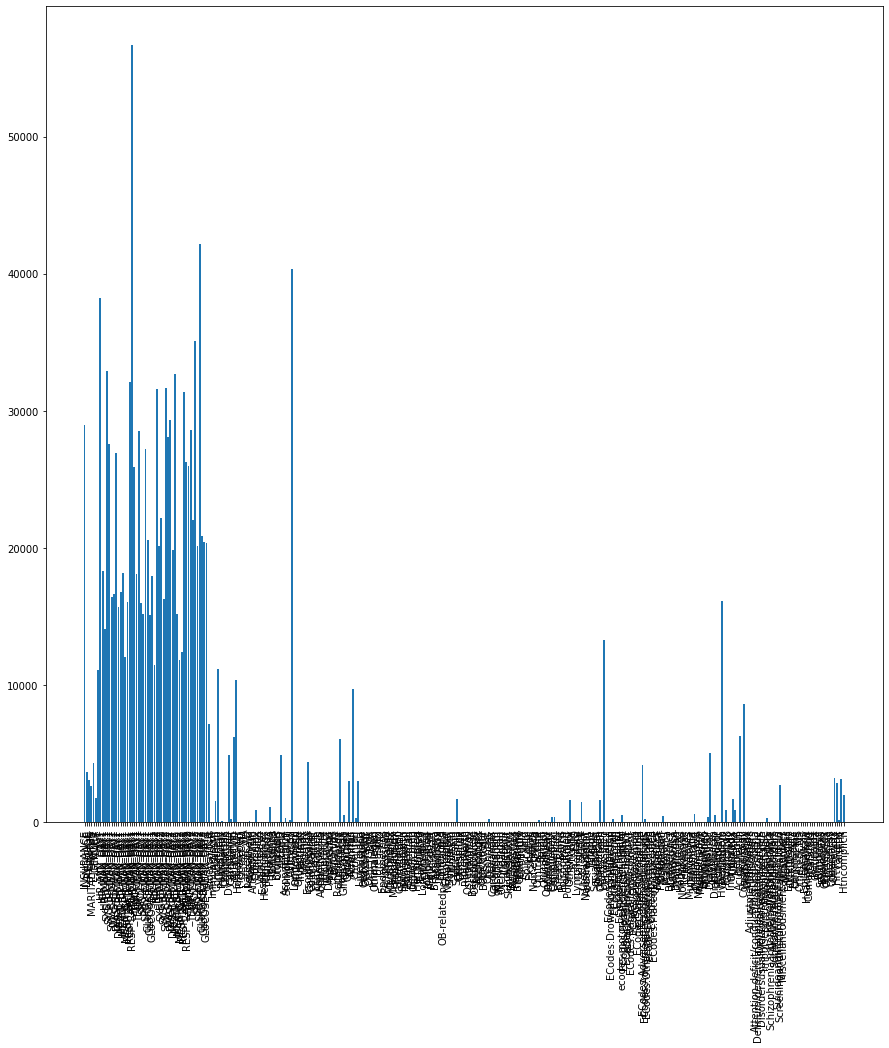

Fold 1
 rows of train = 52737 rows of holdout = 27169
Training until validation scores don't improve for 100 rounds.
[100]	valid_0's binary_logloss: 0.527959	valid_0's binary_logloss: 0.527959	valid_0's auc: 0.79966
[200]	valid_0's binary_logloss: 0.453885	valid_0's binary_logloss: 0.453885	valid_0's auc: 0.816976
[300]	valid_0's binary_logloss: 0.403189	valid_0's binary_logloss: 0.403189	valid_0's auc: 0.827835
[400]	valid_0's binary_logloss: 0.365344	valid_0's binary_logloss: 0.365344	valid_0's auc: 0.832932
[500]	valid_0's binary_logloss: 0.334663	valid_0's binary_logloss: 0.334663	valid_0's auc: 0.837667
[600]	valid_0's binary_logloss: 0.309969	valid_0's binary_logloss: 0.309969	valid_0's auc: 0.839234
[700]	valid_0's binary_logloss: 0.28921	valid_0's binary_logloss: 0.28921	valid_0's auc: 0.840509
[800]	valid_0's binary_logloss: 0.271069	valid_0's binary_logloss: 0.271069	valid_0's auc: 0.841285
[900]	valid_0's binary_logloss: 0.255729	valid_0's binary_logloss: 0.255729	valid_0's 

In [ ]:
##LightGBM

cat_features = cat_feat

cont_features = cont_feat

probs_lgb = np.zeros(shape=(len(test_df),))

scores = []

avg_loss = []

seeds = [1]

for seed in tnrange(len(seeds)):
    
    print(' ')
    
    print('#'*100)
    
    print('Seed',seeds[seed])

    X_train_cv,y_train_cv = train_df.drop(columns=['label']).copy(), train_df['label'].copy()

    sssf = StratifiedShuffleSplit(n_splits=5, test_size = test_size ,random_state=seed)
    
    for i, (idxT, idxV) in enumerate(sssf.split(X_train_cv, y_train_cv)):

        print('Fold',i)

        print(' rows of train =',len(idxT),'rows of holdout =',len(idxV))

        clf = lgb.LGBMClassifier(boosting_type='gbdt',
                                 class_weight='balanced',
                                 n_estimators=10000,
                                 max_depth=10,
                                 learning_rate=0.02,
                                 subsample=0.9,
                                 colsample_bytree=0.4,
                                 objective ='binary',
                                 random_state = 1,
                                 importance_type='gain',
                                 reg_alpha=2,
                                 reg_lambda=2
                                 #cat_features=cat_features
                                )        
        
        h = clf.fit(X_train_cv.iloc[idxT], y_train_cv.iloc[idxT], 
                    eval_set=[(X_train_cv.iloc[idxV],y_train_cv.iloc[idxV])],
                    verbose=100,eval_metric=['binary_logloss','auc'],
                    early_stopping_rounds=100)
        probs_oof = clf.predict_proba(X_train_cv.iloc[idxV])[:,1]
        
        probs_lgb +=clf.predict_proba(test_df.drop(columns=['label']))[:,1]
        
        roc = roc_auc_score(y_train_cv.iloc[idxV],probs_oof)

        scores.append(roc)

        avg_loss.append(clf.best_score_['valid_0']['binary_logloss'])

        print ('LGB Val OOF AUC=',roc)

        print('#'*100)

        if i==0:
            feature_importance(clf,X_train_cv)

print("Log Loss Stats {0:.8f},{1:.8f}".format(np.array(avg_loss).mean(), np.array(avg_loss).std()))

print('%.8f (%.8f)' % (np.array(scores).mean(), np.array(scores).std()))

 
####################################################################################################
Seed 1
Fold 0
 rows of train = 47511 rows of holdout = 24476
[0]	validation_0-auc:0.663336	validation_0-logloss:0.659132
Multiple eval metrics have been passed: 'validation_0-logloss' will be used for early stopping.

Will train until validation_0-logloss hasn't improved in 50 rounds.
[100]	validation_0-auc:0.789678	validation_0-logloss:0.135232
[200]	validation_0-auc:0.817111	validation_0-logloss:0.126238
[300]	validation_0-auc:0.824586	validation_0-logloss:0.124205
[400]	validation_0-auc:0.827602	validation_0-logloss:0.123659
Stopping. Best iteration:
[364]	validation_0-auc:0.827573	validation_0-logloss:0.123648

XGB Val OOF AUC= 0.8275731846526387
####################################################################################################
[0.01539409 0.00646443 0.00677341 0.00606052 0.00757139 0.00631891
 0.00848091 0.01080148 0.00729684 0.00787233 0.01007865 0.00998507
 0.

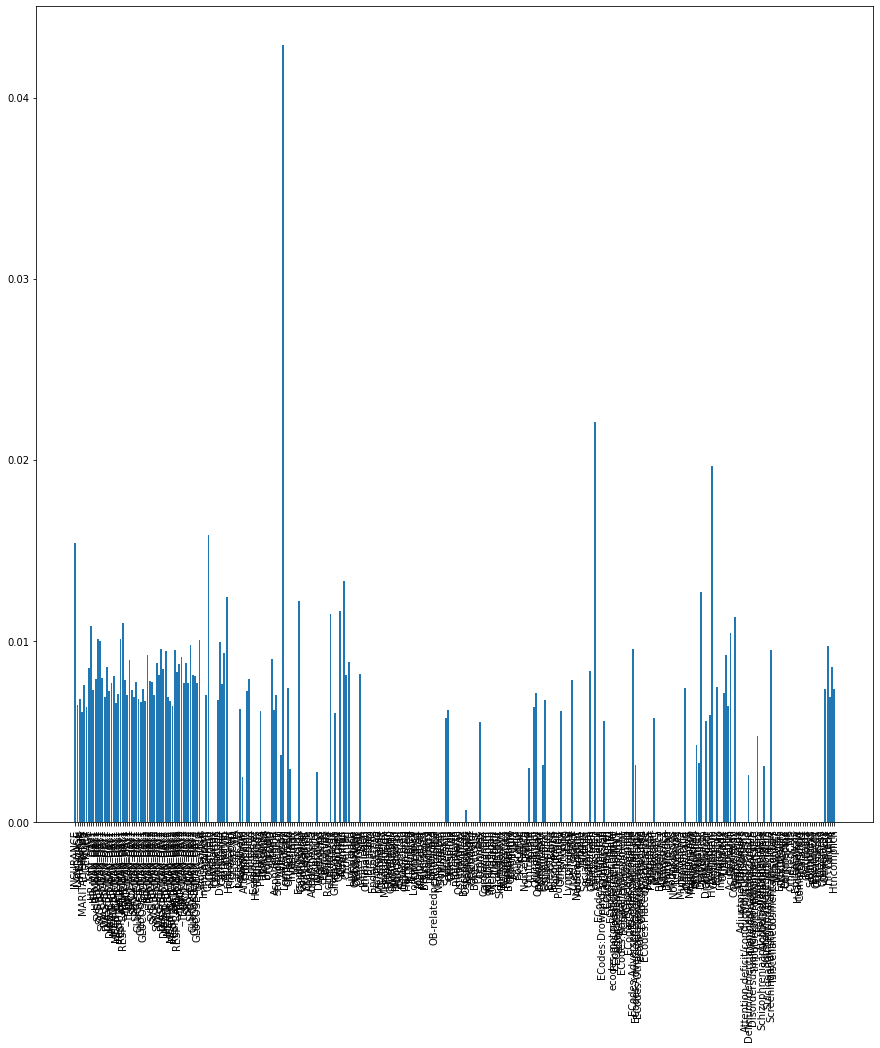

Fold 1
 rows of train = 47511 rows of holdout = 24476
[0]	validation_0-auc:0.661687	validation_0-logloss:0.659062
Multiple eval metrics have been passed: 'validation_0-logloss' will be used for early stopping.

Will train until validation_0-logloss hasn't improved in 50 rounds.
[100]	validation_0-auc:0.798549	validation_0-logloss:0.134357
[200]	validation_0-auc:0.824002	validation_0-logloss:0.124917
[300]	validation_0-auc:0.830805	validation_0-logloss:0.122647
[400]	validation_0-auc:0.833084	validation_0-logloss:0.121964
[500]	validation_0-auc:0.834264	validation_0-logloss:0.121942
Stopping. Best iteration:
[477]	validation_0-auc:0.834578	validation_0-logloss:0.121805

XGB Val OOF AUC= 0.8345778812902103
####################################################################################################
Fold 2
 rows of train = 47511 rows of holdout = 24476
[0]	validation_0-auc:0.652659	validation_0-logloss:0.659092
Multiple eval metrics have been passed: 'validation_0-logloss' will be 

In [ ]:
probs_xgb = np.zeros(shape=(len(test_df),))

scores = []

avg_loss = []

X_train_cv,y_train_cv = train_df.copy(), target.copy()

seeds = [1]

for seed in tnrange(len(seeds)):
    
    print(' ')
    
    print('#'*100)
    
    print('Seed',seeds[seed])
    
    sssf = StratifiedShuffleSplit(n_splits=5, test_size = test_size ,random_state=seed)
    
    for i, (idxT, idxV) in enumerate(sssf.split(X_train_cv, y_train_cv)):

        print('Fold',i)

        print(' rows of train =',len(idxT),'rows of holdout =',len(idxV))

        clf = xgb.XGBClassifier(n_estimators=1000,
                                max_depth=6,
                                learning_rate=0.04,
                                subsample=0.9,
                                colsample_bytree=0.35,
                                objective = 'binary:logistic',
                                random_state = 1
                               )        


        h = clf.fit(X_train_cv.iloc[idxT], y_train_cv.iloc[idxT], 
                    eval_set=[(X_train_cv.iloc[idxV],y_train_cv.iloc[idxV])],
                    verbose=100,eval_metric=['auc','logloss'],
                    early_stopping_rounds=50)
        
        probs_oof = clf.predict_proba(X_train_cv.iloc[idxV])[:,1]
        
        probs_xgb +=clf.predict_proba(test_df)[:,1]

        roc = roc_auc_score(y_train_cv.iloc[idxV],probs_oof)

        scores.append(roc)
        
        avg_loss.append(clf.best_score)

        print ('XGB Val OOF AUC=',roc)

        print('#'*100)

        if i==0:
            
            feature_importance(clf,X_train_cv)
            
print("Log Loss Stats {0:.5f},{1:.5f}".format(np.array(avg_loss).mean(), np.array(avg_loss).std()))

print('%.6f (%.6f)' % (np.array(scores).mean(), np.array(scores).std()))

In [ ]:
cat_feat


 
####################################################################################################
Seed 1
Fold 0
 rows of train = 47511 rows of holdout = 24476
0:	learn: 0.6901489	test: 0.6909789	best: 0.6909789 (0)	total: 296ms	remaining: 49m 15s
100:	learn: 0.5381008	test: 0.6060476	best: 0.6060476 (100)	total: 22.3s	remaining: 36m 22s
200:	learn: 0.4665464	test: 0.5848216	best: 0.5848216 (200)	total: 43.7s	remaining: 35m 29s
300:	learn: 0.4139062	test: 0.5771747	best: 0.5771747 (300)	total: 1m 4s	remaining: 34m 52s
400:	learn: 0.3724041	test: 0.5763229	best: 0.5754190 (353)	total: 1m 26s	remaining: 34m 19s
Stopped by overfitting detector  (60 iterations wait)

bestTest = 0.5754189679
bestIteration = 353

Shrink model to first 354 iterations.
CatBoost Val OOF AUC= 0.7953002465042296
[5.19387833 0.         0.09475861 0.06901005 0.         0.04226774
 0.         3.52520974 0.47110907 0.21900574 3.30078718 3.82590044
 0.37393762 0.23017002 1.65572071 0.20611591 0.23954432 0.45917548

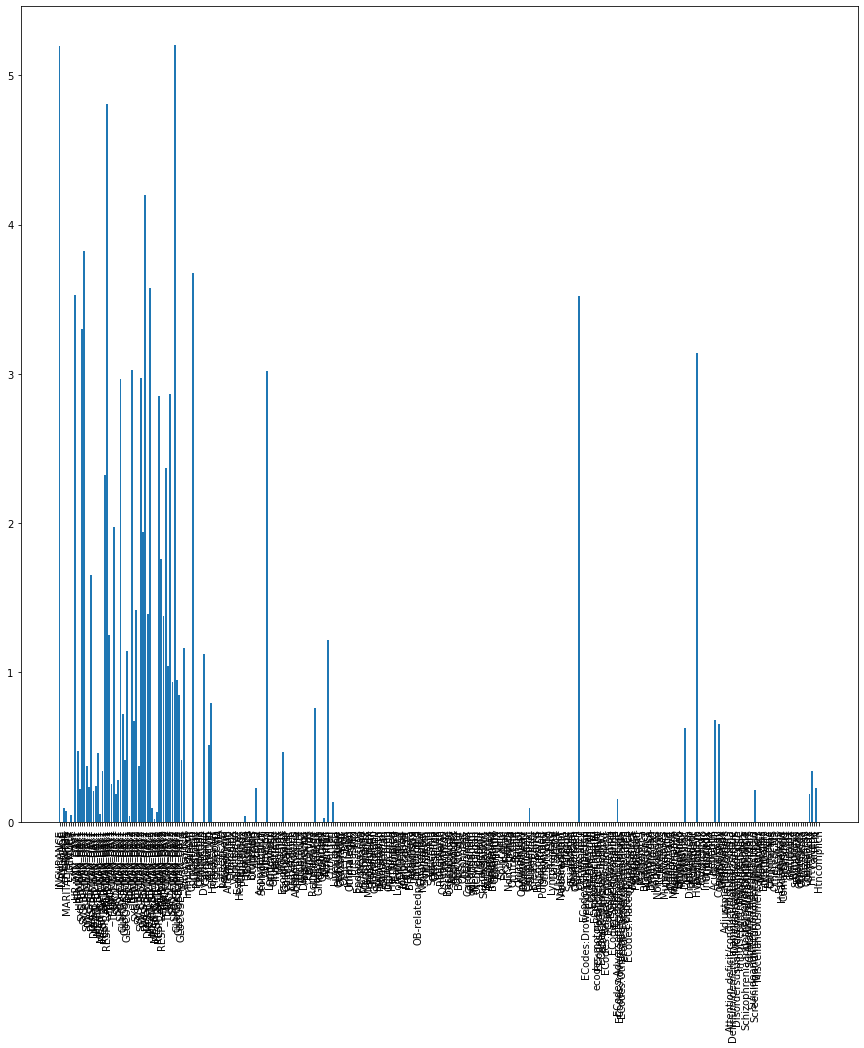

####################################################################################################
Fold 1
 rows of train = 47511 rows of holdout = 24476
0:	learn: 0.6904221	test: 0.6910684	best: 0.6910684 (0)	total: 226ms	remaining: 37m 41s
100:	learn: 0.5419750	test: 0.6018301	best: 0.6018301 (100)	total: 22.2s	remaining: 36m 16s
200:	learn: 0.4691276	test: 0.5774324	best: 0.5774324 (200)	total: 43.9s	remaining: 35m 40s
300:	learn: 0.4176270	test: 0.5682063	best: 0.5682063 (300)	total: 1m 5s	remaining: 35m 2s
400:	learn: 0.3764208	test: 0.5663613	best: 0.5661796 (393)	total: 1m 26s	remaining: 34m 38s
Stopped by overfitting detector  (60 iterations wait)

bestTest = 0.5661795965
bestIteration = 393

Shrink model to first 394 iterations.
CatBoost Val OOF AUC= 0.806378890453995
####################################################################################################
Fold 2
 rows of train = 47511 rows of holdout = 24476
0:	learn: 0.6904567	test: 0.6912033	best: 0.6912033 (0)	

In [ ]:
##CatBoost

cat_features = cat_feat

cont_features = cont_feat

probs_cb = np.zeros(shape=(len(test_df),))

scores = []

avg_loss = []

X_train_cv,y_train_cv = train_df.copy(), target.copy()

seeds = [1]

for seed in tnrange(len(seeds)):
    
    print(' ')
    
    print('#'*100)
    
    print('Seed',seeds[seed])
    
    sssf = StratifiedShuffleSplit(n_splits=5, test_size = test_size ,random_state=seed)
    
    for i, (idxT, idxV) in enumerate(sssf.split(X_train_cv, y_train_cv)):

        print('Fold',i)

        print(' rows of train =',len(idxT),'rows of holdout =',len(idxV))

        clf = CatBoostClassifier(iterations=10000,
                                learning_rate=0.01,
                                auto_class_weights = 'Balanced',
                                random_strength=0.1,
                                depth=8,
                                loss_function='Logloss',
                                eval_metric='Logloss',
                                leaf_estimation_method='Newton',
                                random_state = 1,
                                cat_features =cat_features,
                                subsample = 0.9,
                                rsm = 0.8
                                )    

        h = clf.fit(X_train_cv.iloc[idxT], y_train_cv.iloc[idxT],
                    eval_set=[(X_train_cv.iloc[idxV],y_train_cv.iloc[idxV])],
                   early_stopping_rounds=60,verbose = 100)

        probs_oof = clf.predict_proba(X_train_cv.iloc[idxV])[:,1]
        
        probs_cb +=clf.predict_proba(test_df)[:,1]
        
        roc = roc_auc_score(y_train_cv.iloc[idxV],probs_oof)

        scores.append(roc)

        print ('CatBoost Val OOF AUC=',roc)

        avg_loss.append(clf.best_score_['validation']['Logloss'])

        if i==0:
            
            feature_importance(clf,X_train_cv)

        print('#'*100)

print("Log Loss Stats {0:.8f},{1:.8f}".format(np.array(avg_loss).mean(), np.array(avg_loss).std()))

print('%.8f (%.8f)' % (np.array(scores).mean(), np.array(scores).std()))

In [ ]:
train_df,test_df,actualtst_df

In [ ]:
Counter(train_df['label'])

Counter({0: 77112, 1: 2794})

In [ ]:
test_df.shape

(80, 338)

In [ ]:
test_dff.shape

(4000, 338)

In [ ]:

cat_features = cat_feat

cont_features = cont_feat

In [ ]:
Number of finished trials: 12
Best trial:
  Value: 0.88075
  Params: 
    objective: Logloss
    colsample_bylevel: 0.057442214360228804
    depth: 10
    boosting_type: Plain
    bootstrap_type: MVS

In [ ]:
clf = CatBoostClassifier(iterations=10000,
                        learning_rate=0.01,
                        auto_class_weights = 'Balanced',
                        random_strength=0.1,
                        depth=10,
                        loss_function='Logloss',
                        eval_metric='Logloss',
                        leaf_estimation_method='Newton',
                        boosting_type="Plain",
                        bootstrap_type= "MVS",
                        random_state = 1,
                        cat_features =cat_features,
                        subsample = 0.9,
                        rsm = 0.8
                        )     

h = clf.fit(train_df.drop(columns=['label']),train_df.label.values,
            eval_set=[(test_dff.drop(columns=['label']),test_dff.label.values)],
            early_stopping_rounds=80,verbose = 100)

0:	learn: 0.6894698	test: 0.6906378	best: 0.6906378 (0)	total: 583ms	remaining: 1h 37m 10s
100:	learn: 0.4981302	test: 0.5906625	best: 0.5906625 (100)	total: 51.9s	remaining: 1h 24m 42s
200:	learn: 0.4110329	test: 0.5699799	best: 0.5699799 (200)	total: 1m 42s	remaining: 1h 22m 59s
300:	learn: 0.3514531	test: 0.5714594	best: 0.5683287 (271)	total: 2m 33s	remaining: 1h 22m 11s
Stopped by overfitting detector  (80 iterations wait)

bestTest = 0.5683287075
bestIteration = 271

Shrink model to first 272 iterations.


In [ ]:
actual_test.shape

(20001, 337)

In [ ]:
actualtst_df.shape

(20001, 337)

In [ ]:
preds = clf.predict(actualtst_df)

In [ ]:
Counter(preds)

Counter({0: 17527, 1: 2474})

In [ ]:
Counter({0: 16546, 1: 3455})


In [ ]:
len(preds)

20001

In [ ]:
pd.read_csv

In [ ]:
sb = pd.DataFrame(preds)

In [ ]:
sb.shape

(20001, 1)

In [ ]:
sb.to_csv('mimic_synthetic_testz.csv',sep=',',index=False,header=None)

In [ ]:
hulle_hullare = pd.read_csv('/content/mimic_synthetic_test.csv', delimiter = ",",header=None)


In [ ]:
hulle_hullare

,0
0,0
1,0
2,0
3,0
4,0
...,...
19996,0
19997,1
19998,0
19999,0


In [ ]:
y_train = pd.read_csv('/content/mimic_synthetic_train.solution', delimiter = " ",header=None)

In [ ]:
y_train

,0
0,0
1,0
2,0
3,0
4,0
...,...
79994,0
79995,0
79996,0
79997,0
